In [1]:
# Essential libraries for regression and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
import plotly.io as pio

# For saving interactive plots
pio.kaleido.scope.default_format = "png"

# General plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Load the housing dataset
df = pd.read_csv("../data/Housing.csv")

# Preview data
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Check data types and missing values
print("✅ Dataset Info:\n")
print(df.info())

print("\n✅ Summary Statistics:\n")
print(df.describe())

print("\n✅ Missing Values:\n")
print(df.isnull().sum())


✅ Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

✅ Summary Statistics:

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  

In [4]:
# Only run if missing values exist
missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=missing.values, y=missing.index, palette='magma')
    plt.title("Missing Values by Feature")
    plt.tight_layout()
    plt.savefig("../visuals/missing_values.png")
    plt.show()
else:
    print("✅ No missing values found.")


✅ No missing values found.


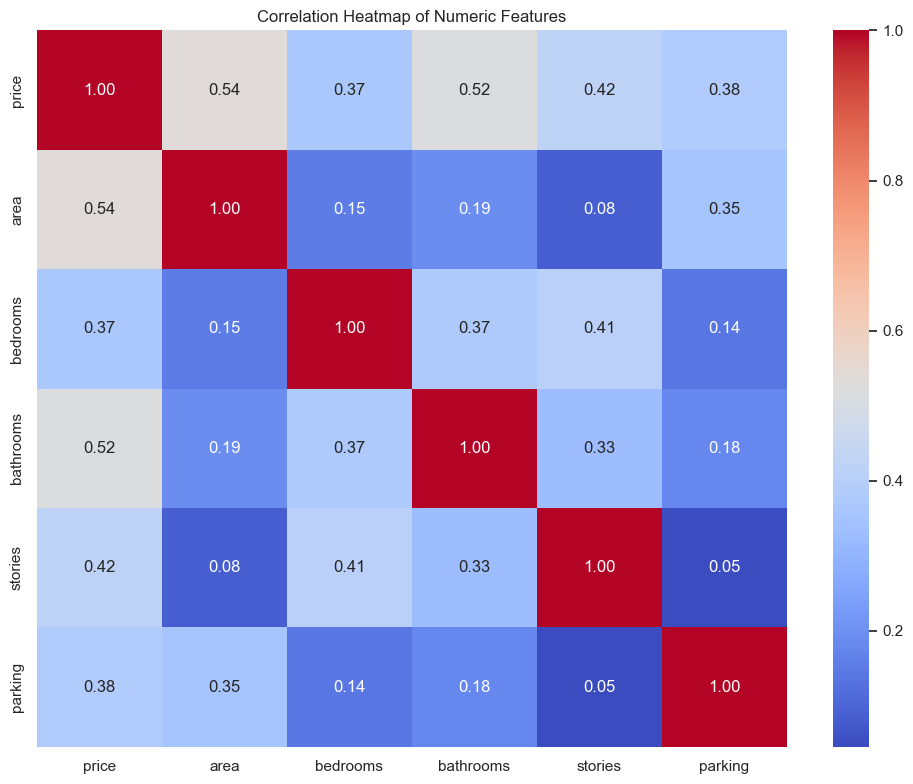

In [6]:
# Visualizing correlation among numeric features only
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig('../visuals/correlation_heatmap.png')
plt.show()


In [7]:
# Selecting top features based on correlation with price
features = ['area', 'bedrooms', 'bathrooms']  # Adjust this based on your dataset's columns
target = 'price'

X = df[features]
y = df[target]

print("✅ Features selected for modeling:", features)


✅ Features selected for modeling: ['area', 'bedrooms', 'bathrooms']


In [20]:
# Optional Quick Fix: Drop non-numeric columns (like 'yes', 'no', strings)
df_numeric = df.select_dtypes(include=[np.number])
print("✅ Using only numeric features for linear regression:\n", df_numeric.columns.tolist())

# Prepare X and y
X = df_numeric.drop('price', axis=1)  # Assuming 'price' is your target column
y = df_numeric['price']


✅ Using only numeric features for linear regression:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model on scaled data
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training set size: {X_train.shape}")
print(f"✅ Testing set size: {X_test.shape}")


✅ Training set size: (436, 5)
✅ Testing set size: (109, 5)


In [26]:
# Initialize and fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully.")


✅ Linear Regression model trained successfully.


In [28]:
# Display coefficients safely
coefficients = pd.DataFrame({
    'Feature': X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(len(model.coef_))],
    'Coefficient': model.coef_
})

print("\n✅ Model Coefficients:\n", coefficients)
print(f"\n✅ Intercept: {model.intercept_}")



✅ Model Coefficients:
      Feature   Coefficient
0       area  3.088670e+02
1   bedrooms  1.512468e+05
2  bathrooms  1.185732e+06
3    stories  4.951008e+05
4    parking  3.376608e+05

✅ Intercept: 51999.67680883687


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error (MAE): {mae:,.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:,.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"✅ R² Score: {r2:.2f}")

# Feedback based on R² score
if r2 < 0:
    print("\n❌ Warning: Negative R² Score!")
    print("The model is performing worse than simply predicting the average house price.")
    print("\n➡️ Possible Quick Fixes Before Next Iteration:")
    print("- Drop or encode non-numeric features")
    print("- Normalize / scale your features")
    print("- Check data for outliers")
    print("- Try advanced models: Ridge, Lasso, Decision Trees, etc.")
elif r2 < 0.5:
    print("\n⚠️ Note: Model performance is low.")
    print("Further feature engineering and better models needed.")
else:
    print("\n✅ Good Job! Model shows acceptable predictive power.")


✅ Mean Absolute Error (MAE): 1,265,275.67
✅ Mean Squared Error (MSE): 2,750,040,479,309.05
✅ Root Mean Squared Error (RMSE): 1,658,324.60
✅ R² Score: 0.46

⚠️ Note: Model performance is low.
Further feature engineering and better models needed.


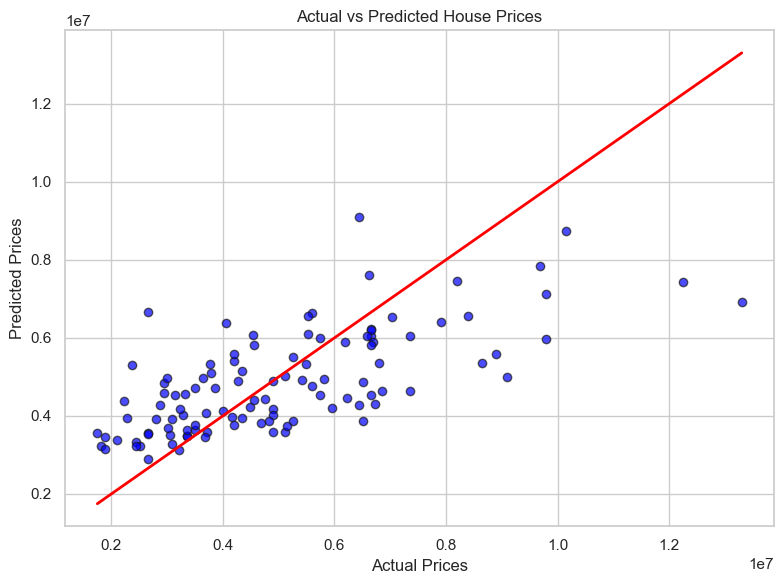

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.savefig('../visuals/actual_vs_predicted.png')
plt.show()


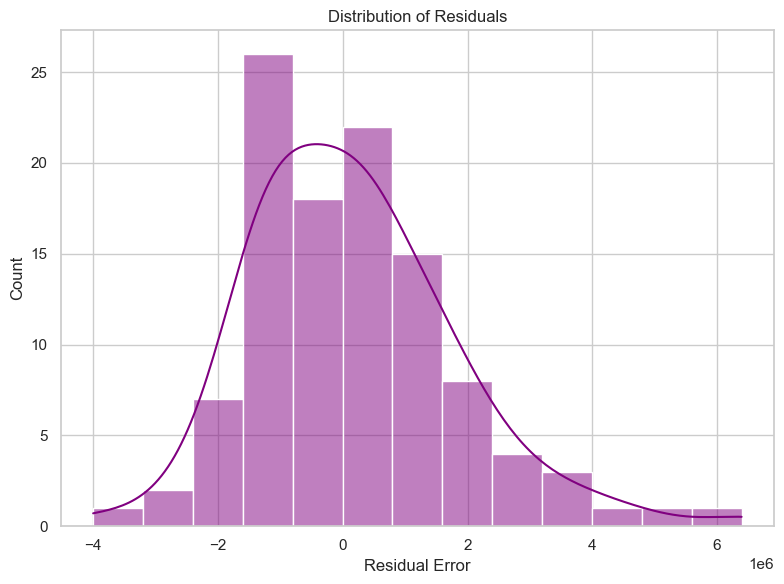

In [13]:
# Distribution of residual errors
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Error')
plt.tight_layout()
plt.savefig('../visuals/residuals_distribution.png')
plt.show()


In [14]:
fig = px.scatter_3d(
    df, 
    x='area', 
    y='bedrooms', 
    z='price', 
    color='bathrooms', 
    title='3D Visualization: Area vs Bedrooms vs Price',
    template='plotly_dark'
)

fig.write_image("../visuals/3d_scatter_plot.png")
fig.show()
